In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [26]:
# Define file paths
processed_data_path = 'D:/healthcare_analytics_project/data/processed/framingham_preprocessed.csv'
visualization_path = 'D:/healthcare_analytics_project/notebooks/visualization_images/'

In [27]:
# Load the preprocessed dataset
framingham_data = pd.read_csv(processed_data_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
display(framingham_data.head())

# Check the shape of the dataset
print(f"Dataset Shape: {framingham_data.shape}")

Dataset Preview:


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_group
0,1,-1.232580,3,0,-0.757169,-0.176901,-0.075987,-0.672860,-0.166784,-0.949108,-1.194111,-1.078881,0.292050,0.356370,-0.203044,0,30-40
1,0,-0.414905,1,0,-0.757169,-0.176901,-0.075987,-0.672860,-0.166784,0.298294,-0.514881,-0.160118,0.725010,1.608469,-0.244883,0,40-50
2,1,-0.181283,0,1,0.920689,-0.176901,-0.075987,-0.672860,-0.166784,0.184894,-0.220548,-0.243642,-0.108929,-0.060996,-0.495920,0,40-50
3,0,1.337256,2,1,1.759618,-0.176901,-0.075987,1.486194,-0.166784,-0.268707,0.798296,1.009217,0.688110,-0.895729,0.884782,1,60+
4,0,-0.414905,2,1,1.172368,-0.176901,-0.075987,-0.672860,-0.166784,1.092095,-0.107344,0.090454,-0.659969,0.773736,0.131672,0,40-50


Dataset Shape: (3658, 17)


In [28]:
# Display basic information about the dataset
print("\nDataset Information:")
framingham_data.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
display(framingham_data.describe())

# Check for missing values
print("\nMissing Values:")
print(framingham_data.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3658 non-null   int64  
 1   age              3658 non-null   float64
 2   education        3658 non-null   int64  
 3   currentSmoker    3658 non-null   int64  
 4   cigsPerDay       3658 non-null   float64
 5   BPMeds           3658 non-null   float64
 6   prevalentStroke  3658 non-null   float64
 7   prevalentHyp     3658 non-null   float64
 8   diabetes         3658 non-null   float64
 9   totChol          3658 non-null   float64
 10  sysBP            3658 non-null   float64
 11  diaBP            3658 non-null   float64
 12  BMI              3658 non-null   float64
 13  heartRate        3658 non-null   float64
 14  glucose          3658 non-null   float64
 15  TenYearCHD       3658 non-null   int64  
 16  age_group        3658 non-null   objec

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3.658000e+03,3658.000000,3658.000000,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3.658000e+03,3658.000000
mean,0.443685,-2.330922e-16,0.980317,0.489065,2.622287e-17,6.992766e-17,-5.827305e-18,-2.719409e-17,1.942435e-17,-2.646568e-16,-6.244929e-16,2.262937e-16,2.369771e-16,-1.204310e-16,-1.301431e-16,0.152269
std,0.496886,1.000137e+00,1.022656,0.499949,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,1.000137e+00,0.359331
min,0.000000,-2.050255e+00,0.000000,0.000000,-7.571689e-01,-1.769012e-01,-7.598677e-02,-6.728598e-01,-1.667837e-01,-2.808870e+00,-2.212955e+00,-2.916407e+00,-2.519727e+00,-2.648667e+00,-1.751103e+00,0.000000
25%,0.000000,-8.821476e-01,0.000000,0.000000,-7.571689e-01,-1.769012e-01,-7.598677e-02,-6.728598e-01,-1.667837e-01,-6.996275e-01,-6.960091e-01,-6.612613e-01,-6.648886e-01,-6.453088e-01,-4.540803e-01,0.000000
50%,0.000000,-6.447261e-02,1.000000,0.000000,-7.571689e-01,-1.769012e-01,-7.598677e-02,-6.728598e-01,-1.667837e-01,-6.458662e-02,-1.979074e-01,-7.659402e-02,-9.908921e-02,-6.099616e-02,-1.612042e-01,0.000000
75%,1.000000,7.532023e-01,2.000000,1.000000,9.206890e-01,-1.769012e-01,-7.598677e-02,1.486194e+00,-1.667837e-01,5.931342e-01,5.209438e-01,5.915972e-01,5.546551e-01,5.233165e-01,2.153507e-01,0.000000
max,1.000000,2.388552e+00,3.000000,1.000000,5.115334e+00,5.652871e+00,1.316019e+01,1.486194e+00,5.995790e+00,8.236304e+00,7.364181e+00,4.976602e+00,7.630223e+00,5.615184e+00,1.306006e+01,1.000000



Missing Values:
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
age_group          0
dtype: int64


C:\Users\nwjsh\AppData\Local\Temp\ipykernel_11852\1928108130.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=framingham_data, palette='Set2')


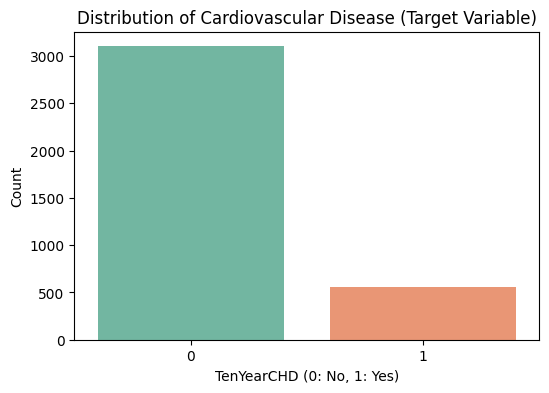

In [30]:
# Visualizations

# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='TenYearCHD', data=framingham_data, palette='Set2')
plt.title('Distribution of Cardiovascular Disease (Target Variable)')
plt.xlabel('TenYearCHD (0: No, 1: Yes)')
plt.ylabel('Count')
plt.savefig(os.path.join(visualization_path, 'target_distribution.png'))
plt.show()

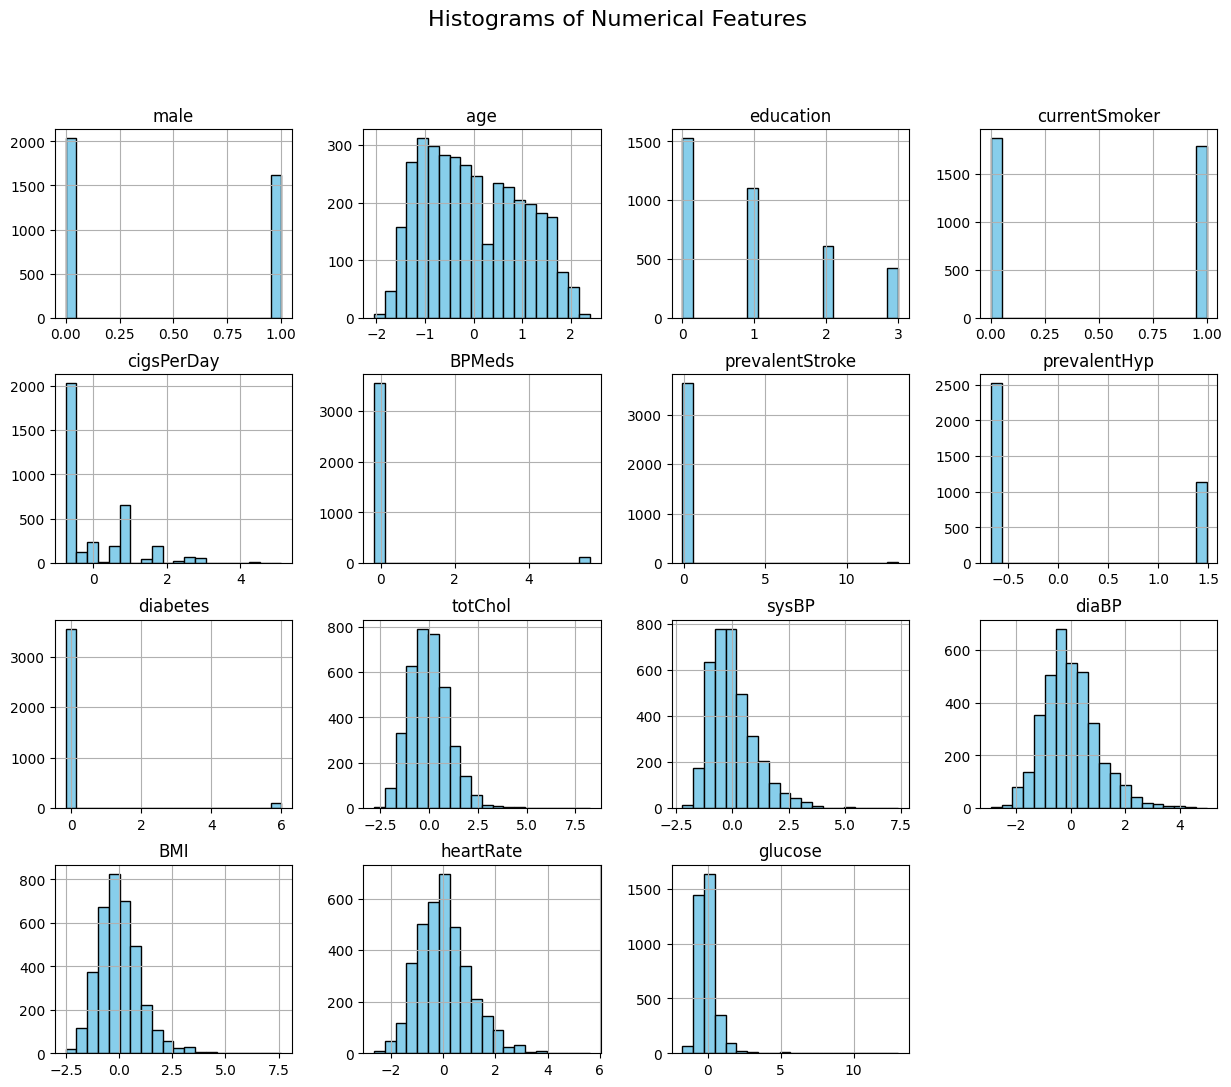

In [31]:
# Histograms for numerical features
numerical_features = framingham_data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('TenYearCHD')  # Exclude the target variable

framingham_data[numerical_features].hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.savefig(os.path.join(visualization_path, 'numerical_histograms.png'))
plt.show()

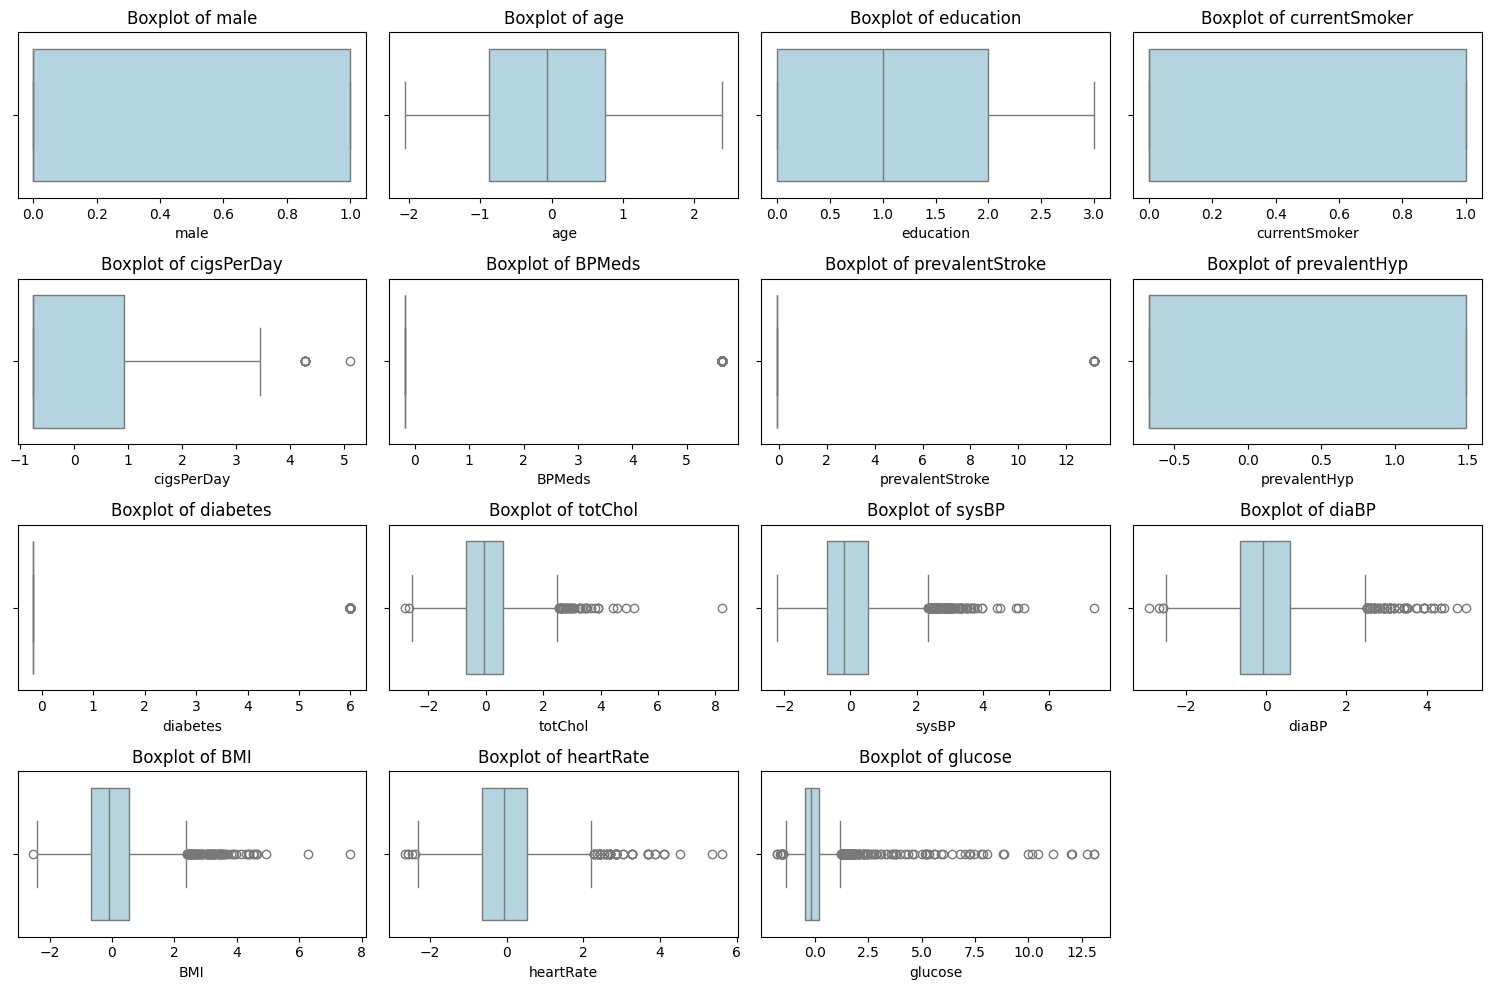

In [32]:
# Boxplots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=framingham_data, x=col, color='lightblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig(os.path.join(visualization_path, 'numerical_boxplots.png'))
plt.show()

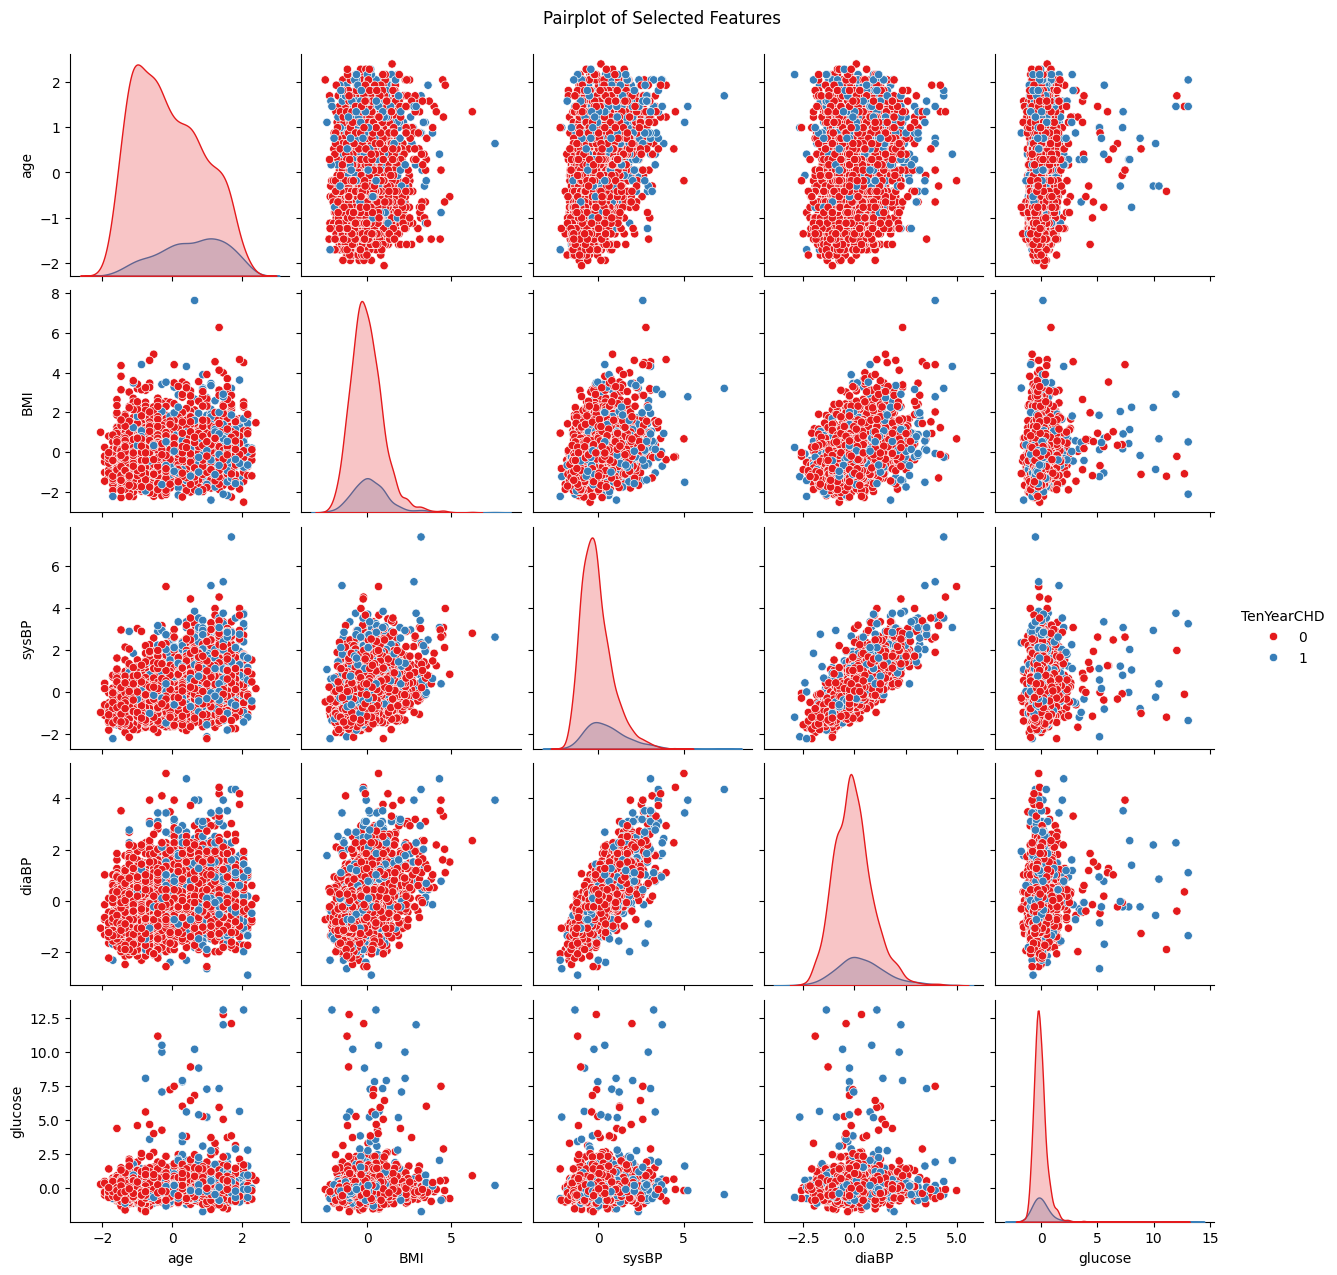

In [33]:
# Pairplot for relationships between selected features
selected_features = ['age', 'BMI', 'sysBP', 'diaBP', 'glucose', 'TenYearCHD']
sns.pairplot(framingham_data[selected_features], hue='TenYearCHD', palette='Set1')
plt.suptitle('Pairplot of Selected Features', y=1.02)
pairplot_path = os.path.join(visualization_path, 'pairplot_selected_features.png')
plt.savefig(pairplot_path)
plt.show()

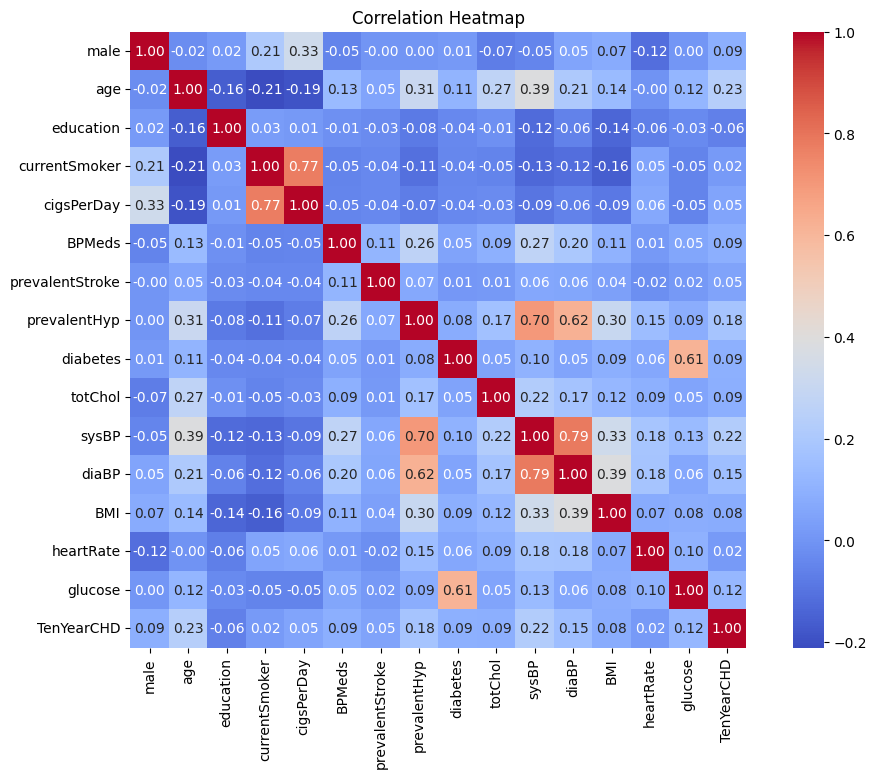

In [35]:
# Correlation heatmap
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_data = framingham_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')

# Save the heatmap image
heatmap_path = os.path.join(visualization_path, 'correlation_heatmap.png')
plt.savefig(heatmap_path)
plt.show()
